<a href="https://colab.research.google.com/github/vishnuvryeruva/Data-Augmentation--Activation-functions--Regularization/blob/main/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import tensorflow as tf
from tensorflow import keras

print("Tensorflow version" , tf.__version__)
print("Keras version" , keras.__version__)


Tensorflow version 2.8.0
Keras version 2.8.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

we will divide the training dataset into a tarining and a validation dataset , which will be used in further steps. we will scale the pixels into range(0,1)

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

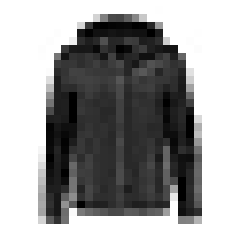

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
print("The records in validaton set is",X_valid.shape)
print("The records in Testing set is",X_test.shape)

The records in validaton set is (5000, 28, 28)
The records in Testing set is (10000, 28, 28)


Saving figure fashion_mnist_plot


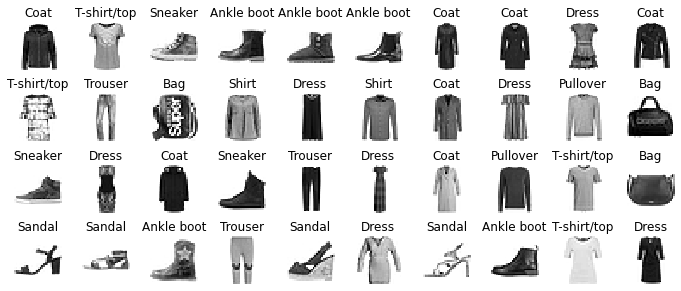

In [9]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [11]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
model.layers

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


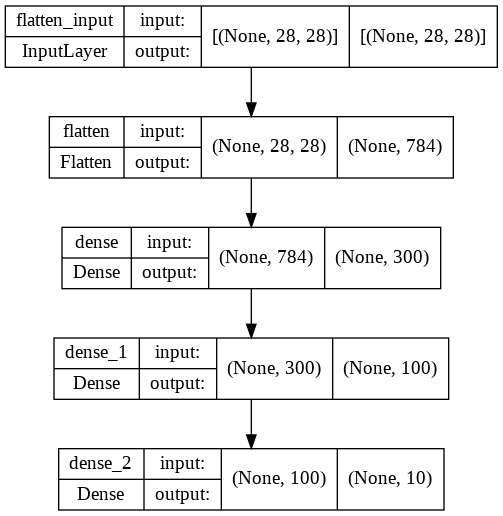

In [14]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [16]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7262 - accuracy: 0.7603 - val_loss: 0.5120 - val_accuracy: 0.8230
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4896 - accuracy: 0.8283 - val_loss: 0.4383 - val_accuracy: 0.8518
Epoch 3/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4449 - accuracy: 0.8439 - val_loss: 0.5360 - val_accuracy: 0.7992
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4179 - accuracy: 0.8542 - val_loss: 0.3951 - val_accuracy: 0.8666
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3987 - accuracy: 0.8608 - val_loss: 0.3769 - val_accuracy: 0.8700
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3801 - accuracy: 0.8663 - val_loss: 0.3719 - val_accuracy: 0.8736
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3675 - accuracy: 0.8711 - val_loss: 0.3651 - val_accuracy:

Saving figure keras_learning_curves_plot


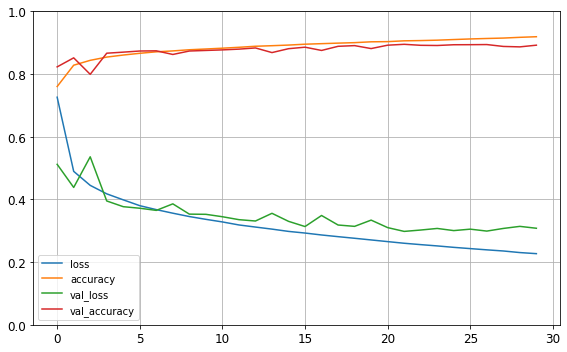

In [17]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [18]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3416 - accuracy: 0.8812


[0.34162837266921997, 0.8812000155448914]

In [19]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [20]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

Saving figure fashion_mnist_images_plot


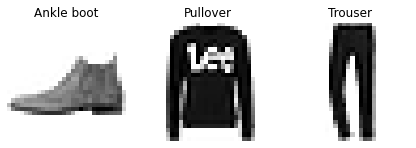

In [21]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

Regression

In [22]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [23]:
np.random.seed(102)
tf.random.set_seed(102)

create a sequential model and add dense layer with "Relu" activatioon function. Then, we will train the model at 20 Epochs and see how the model works over testing data

In [24]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.9469 - val_loss: 0.9884
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8105 - val_loss: 0.7313
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6896 - val_loss: 0.6558
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6383 - val_loss: 0.6197
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6038 - val_loss: 0.6268
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5783 - val_loss: 0.5757
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5570 - val_loss: 0.5458
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5385 - val_loss: 0.5485
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5234 - val_loss: 0.5367
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5103 - val_loss: 0.4925

After about 12 Epochs, it can be seen that the loss curve is stagnant after above image

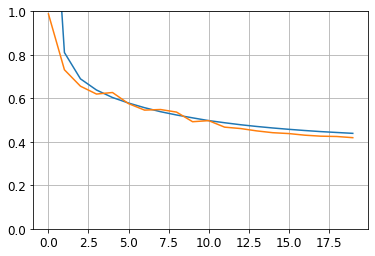

In [25]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

##**References**
https://github.com/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb

https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/classification.ipynb

https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb